<a href="https://www.kaggle.com/code/vijays140291/oscillation-prediction?scriptVersionId=194561027" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [62]:
#importing library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/oscillator/Valeur_Flottante_QV1.csv')
df

,Cycle Cumulé,Valeur suivante,Valeur flottante
0,0,2,2
1,2,9,11
2,11,-13,-4
3,-2,4,-9
4,2,12,16
...,...,...,...
2523,0,0,3
2524,0,-1,-1
2525,-1,4,3
2526,3,-11,-7


<Axes: >

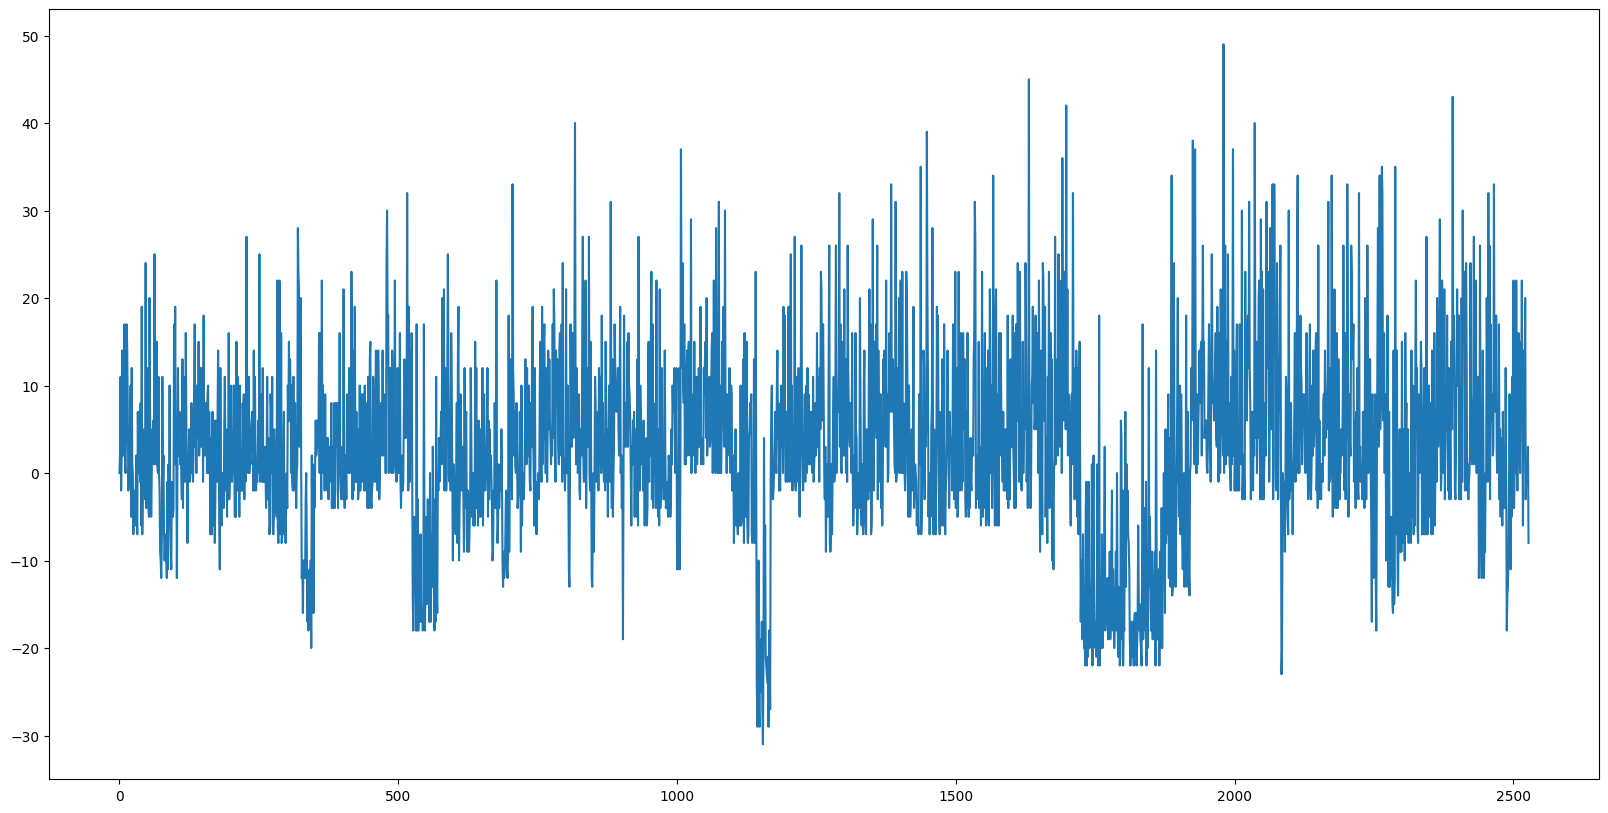

In [65]:
df['Cycle Cumulé'].plot(kind='line',figsize=(20,10))

<Axes: >

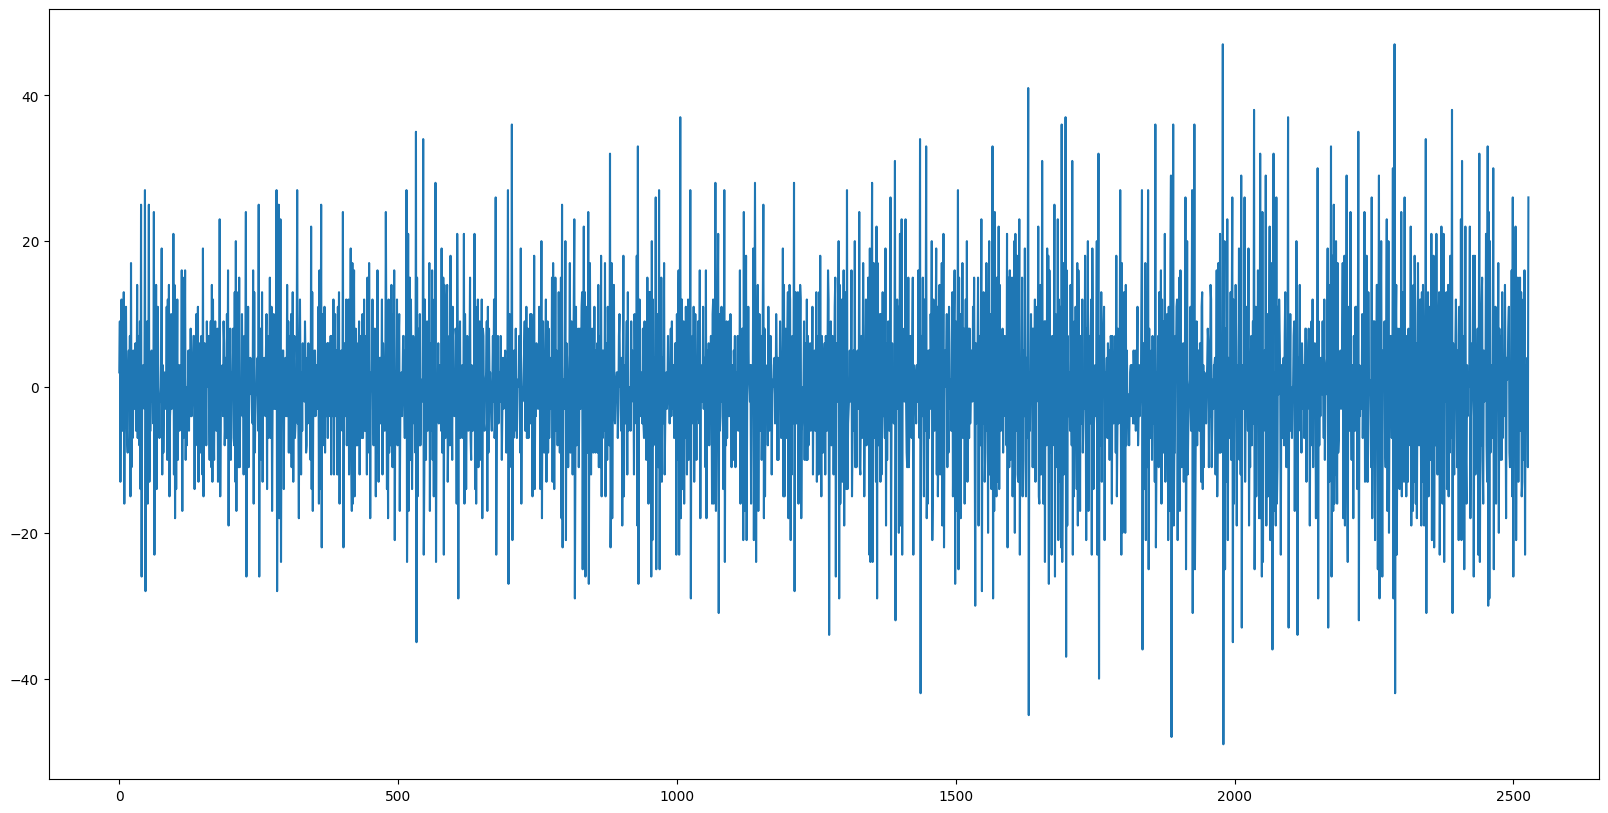

In [66]:
df['Valeur suivante'].plot(kind='line',figsize=(20,10))

In [4]:
max(df['Cycle Cumulé'])

49

In [5]:
min(df['Cycle Cumulé'])

-31

In [6]:
max(df['Valeur suivante'])

47

In [7]:
min(df['Valeur suivante'])

-49

In [8]:
x=df[list(df.columns[:2])]
y=df[df.columns[-1]]

In [9]:
x

,Cycle Cumulé,Valeur suivante
0,0,2
1,2,9
2,11,-13
3,-2,4
4,2,12
...,...,...
2523,0,0
2524,0,-1
2525,-1,4
2526,3,-11


In [10]:
y

0        2
1       11
2       -4
3       -9
4       16
        ..
2523     3
2524    -1
2525     3
2526    -7
2527    15
Name: Valeur flottante, Length: 2528, dtype: int64

# Before Adding Features

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=122)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

# Before hypertuning

In [12]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.30264131898324376

# Result

# After hypertuning

In [13]:
model = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.39930976625478265

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print(f"Test Score (R^2): {test_score:.4f}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Test Score (R^2): 0.3909


# After adding new Features

In [15]:
df_new=df.copy()
df_new['Cycle greater or less']=df_new['Cycle Cumulé'].apply(lambda x:1 if x>0 else 0)
df_new['Valeur greater or less']=df_new['Valeur flottante'].apply(lambda x:1 if x>0 else 0)
df_new

,Cycle Cumulé,Valeur suivante,Valeur flottante,Cycle greater or less,Valeur greater or less
0,0,2,2,0,1
1,2,9,11,1,1
2,11,-13,-4,1,0
3,-2,4,-9,0,0
4,2,12,16,1,1
...,...,...,...,...,...
2523,0,0,3,0,1
2524,0,-1,-1,0,0
2525,-1,4,3,0,1
2526,3,-11,-7,1,0


In [16]:

df_new['Cycle_Moving Average'] = df_new['Cycle Cumulé'].rolling(window=2).mean()

df_new['Cycle_Cumulative Deviation'] = (df_new['Cycle Cumulé'] - df_new['Cycle Cumulé'].mean()).cumsum()
df_new['Valeur_Moving Average'] = df_new['Valeur flottante'].rolling(window=2).mean()

df_new['Valeur_Cumulative Deviation'] = (df_new['Valeur flottante'] - df_new['Valeur flottante'].mean()).cumsum()


In [21]:
df_new

,Cycle Cumulé,Valeur suivante,Valeur flottante,Cycle greater or less,Valeur greater or less,Cycle_Moving Average,Cycle_Cumulative Deviation,Valeur_Moving Average,Valeur_Cumulative Deviation
0,0,2,2,0,1,NaN,-3.047073e+00,NaN,1.993671e+00
1,2,9,11,1,1,1.0,-4.094146e+00,6.5,1.298734e+01
2,11,-13,-4,1,0,6.5,3.858782e+00,3.5,8.981013e+00
3,-2,4,-9,0,0,4.5,-1.188291e+00,-6.5,-2.531646e-02
4,2,12,16,1,1,0.0,-2.235364e+00,3.5,1.596835e+01
...,...,...,...,...,...,...,...,...,...
2523,0,0,3,0,1,-1.5,1.818829e+01,-8.5,-9.974684e+00
2524,0,-1,-1,0,0,0.0,1.514122e+01,1.0,-1.098101e+01
2525,-1,4,3,0,1,-0.5,1.109415e+01,1.0,-7.987342e+00
2526,3,-11,-7,1,0,1.0,1.104707e+01,-2.0,-1.499367e+01


In [22]:
df_new.isna().sum()

Cycle Cumulé                   0
Valeur suivante                0
Valeur flottante               0
Cycle greater or less          0
Valeur greater or less         0
Cycle_Moving Average           1
Cycle_Cumulative Deviation     0
Valeur_Moving Average          1
Valeur_Cumulative Deviation    0
dtype: int64

In [26]:
df_new['Cycle_Moving Average']=df_new['Cycle_Moving Average'].fillna(df_new['Cycle_Moving Average'].mean())
df_new['Valeur_Moving Average']=df_new['Valeur_Moving Average'].fillna(df_new['Valeur_Moving Average'].mean())



In [27]:
y_new=df_new['Valeur flottante']
x_new=df_new.drop('Valeur flottante',axis=1)

In [120]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y_new,train_size=0.90,random_state=123,shuffle=False)

In [121]:
scaler=StandardScaler()
scaler.fit(x_train_new)
x_train_new=pd.DataFrame(scaler.transform(x_train_new),columns=x_train_new.columns,index=x_train_new.index)
x_test_new=pd.DataFrame(scaler.transform(x_test_new),columns=x_test_new.columns,index=x_test_new.index)

# Result

In [76]:
model_new = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100)
model_new.fit(x_train_new,y_train_new)
model_new.score(x_test_new,y_test_new)

0.9090181913758404

In [77]:
y_test_new

304      0
807     -2
1026   -23
658      3
2249     6
        ..
1327    21
466    -13
351     10
1757    -8
91     -19
Name: Valeur flottante, Length: 506, dtype: int64

In [80]:
y_pred=model_new.predict(x_test_new)

# Root Mean Square Error

In [83]:
np.sqrt(np.mean((y_pred-y_test_new)**2))

3.7124367836846464

# XGBOOST REGRESSOR

In [122]:
import xgboost as xgb

model = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=10000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50
)

model.fit(x_train_new, y_train_new,
          eval_set=[(x_test_new, y_test_new)],
          
          verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [123]:
y_pred = model.predict(x_test_new)

In [124]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_new, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 2.5816380219125272


In [125]:
model.score(x_test_new,y_test_new)

0.9669361392291795

In [126]:
model.predict(x_test_new)

array([-2.71102562e+01,  8.59601307e+00, -4.26754189e+00, -1.33155832e+01,
        3.96596044e-01,  6.20078707e+00,  4.18172216e+00, -8.20608139e+00,
       -1.07079391e+01,  2.53759460e+01,  4.15088081e+00, -2.31426334e+01,
        3.68658333e+01,  1.06964579e+01, -2.38066101e+01,  1.47112694e+01,
       -4.48131990e+00, -2.72929745e+01,  2.12545252e+00,  6.71848345e+00,
        7.89434242e+00, -7.75022364e+00, -7.61098623e+00, -3.56477642e+00,
        1.59298601e+01,  6.42654705e+00, -1.77250328e+01,  3.86409235e+00,
        9.02734470e+00, -1.12984476e+01,  1.45042200e+01,  9.49390984e+00,
       -4.86965227e+00, -1.11053658e+01, -9.58398438e+00,  6.88505793e+00,
       -5.67177868e+00, -7.83708763e+00,  1.84350574e+00, -2.18689513e+00,
       -5.21158504e+00,  1.45660124e+01,  2.93741322e+00, -5.10277510e+00,
        1.29065208e+01, -1.26490545e+01, -6.10242701e+00, -2.63243139e-01,
        7.58779478e+00,  2.42406311e+01, -4.65826941e+00, -1.03164110e+01,
       -1.36154261e+01, -

In [127]:
y_test_new

2275   -31
2276     6
2277     0
2278   -18
2279     1
        ..
2523     3
2524    -1
2525     3
2526    -7
2527    15
Name: Valeur flottante, Length: 253, dtype: int64

In [57]:
x_train_new.shape

(2022, 8)

# NEURAL NETWORK

In [42]:
import tensorflow as tf

In [58]:
inputs=tf.keras.Input(shape=(8,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='linear')(x)

tf_model=tf.keras.Model(inputs=inputs,outputs=outputs)

tf_model.compile(optimizer='adam',loss='mse')
batch_size=32
epochs=100

history=tf_model.fit(x_train_new,y_train_new,validation_split=0.2,batch_size=batch_size,epochs=epochs,
                 callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 105.8971 - val_loss: 46.7111 - learning_rate: 0.0010
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.5298 - val_loss: 24.5239 - learning_rate: 0.0010
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.6249 - val_loss: 15.4357 - learning_rate: 0.0010
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4655 - val_loss: 9.3221 - learning_rate: 0.0010
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0568 - val_loss: 7.2115 - learning_rate: 0.0010
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2390 - val_loss: 5.5913 - learning_rate: 0.0010
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0211 - val_loss: 5.1846 - learning_rate: 0.0010
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7575 - val_loss: 4.7818 - learning_rate: 0.0010
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4386 - val_loss: 4.2438 - learning_rate: 0.0010
Epoch 10/100

In [59]:
tf_model.evaluate(x_test_new,y_test_new)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1167 


1.0314314365386963

In [96]:
y_pred = model.predict(x_test_new)


RMSE: 3.398761136974777
